# EDA on credit card dataset
kaggle_link = https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# Importing for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\mikun\Downloads\archive\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Checking Shape, NULL Values and Duplicates

In [4]:
df.shape

(284807, 31)

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1081)

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(283726, 31)

In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Highly imblance dataset

In [10]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [11]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

In [12]:
df.groupby('Class')['Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


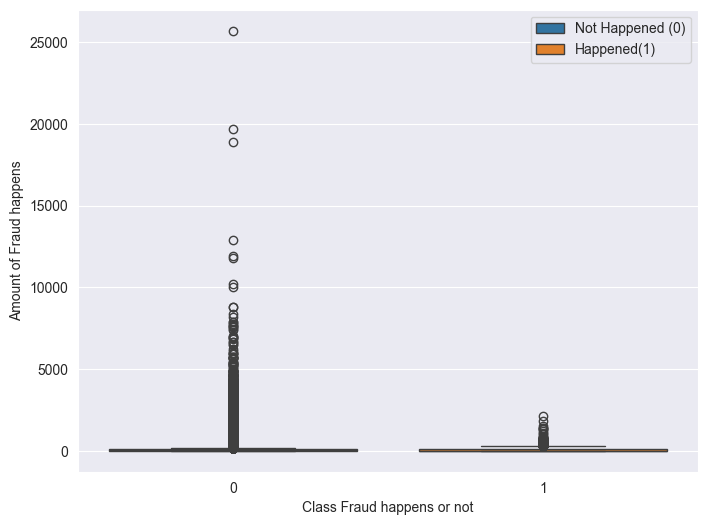

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=df["Class"], y=df["Amount"], hue=df["Class"])

plt.xlabel("Class Fraud happens or not")
plt.ylabel("Amount of Fraud happens")
plt.legend(["Not Happened (0)", "Happened(1)"])
plt.show()


In [14]:
df.groupby('Class')['Time'].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,94835.058093,47475.550607,0.0,54233.0,84711.0,139308.0,172792.0
1,473.0,80450.513742,48636.179973,406.0,41203.0,73408.0,129095.0,170348.0


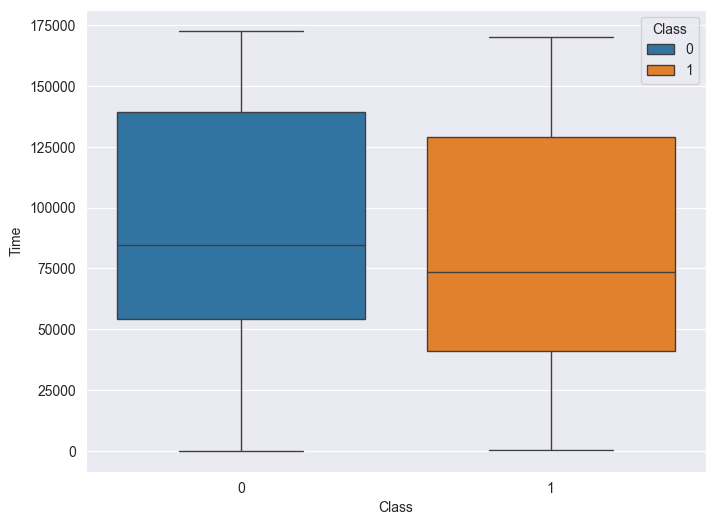

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=df["Class"], y=df["Time"], hue=df["Class"])

plt.show()

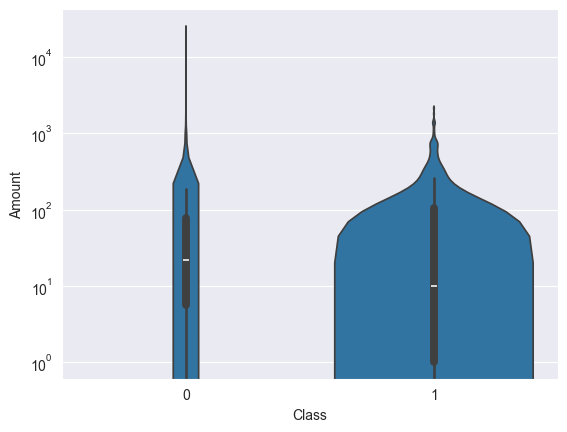

In [16]:
sns.violinplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.show()

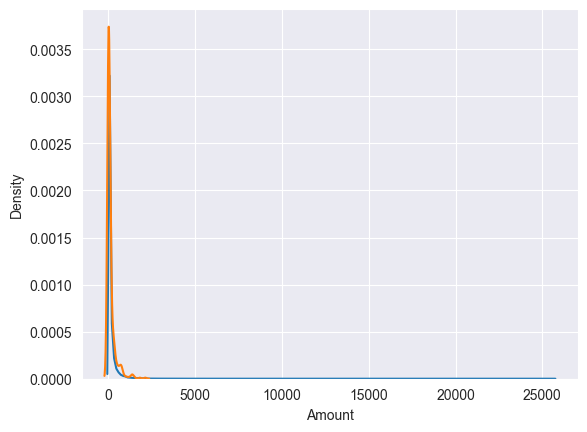

In [17]:
sns.kdeplot(df[df['Class']==0]['Amount'], label='Non-Fraud')
sns.kdeplot(df[df['Class']==1]['Amount'], label='Fraud')
plt.show()

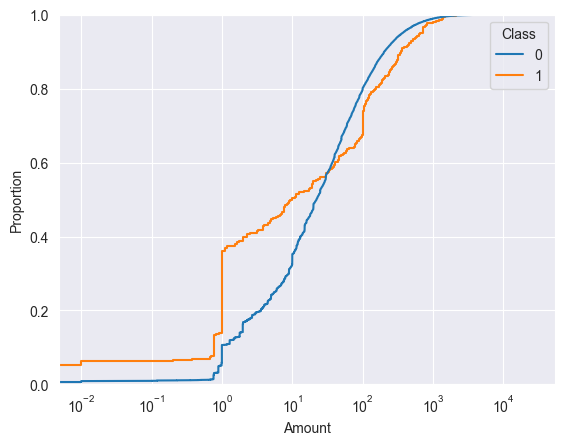

In [18]:
sns.ecdfplot(df, x='Amount', hue='Class')
plt.xscale('log')
plt.show()

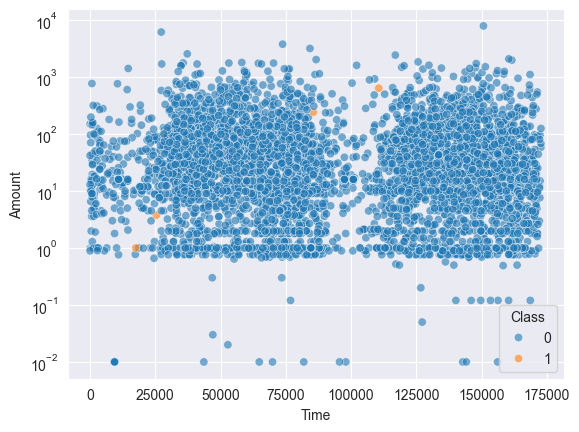

In [19]:
sample = df.sample(5000, random_state=42)

sns.scatterplot(
    data=sample,
    x='Time',
    y='Amount',
    hue='Class',
    alpha=0.6
)
plt.yscale('log')
plt.show()

# Machine learning

In [20]:
# all imports for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

### Devide the dataset into X and y

In [21]:
X = df.drop("Class", axis=1)
y = df["Class"]

### Train-Test Split (STRATIFIED)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [23]:
# keeping copies for visualization
X_train_before = X_train.copy()
X_test_before = X_test.copy()

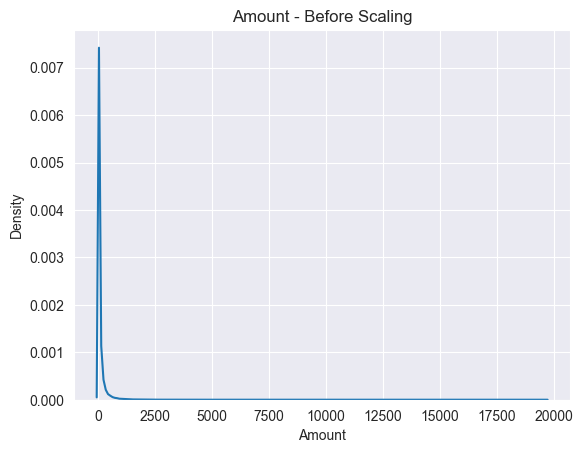

In [24]:
sns.kdeplot(X_train_before['Amount'])
plt.title("Amount - Before Scaling")
plt.show()

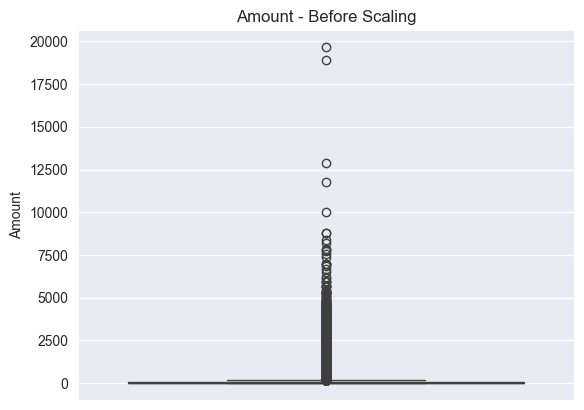

In [25]:
sns.boxplot(y=X_train_before['Amount'])
plt.title("Amount - Before Scaling")
plt.show()

In [26]:
scaler = StandardScaler()

X_train[["Amount", "Time"]] = scaler.fit_transform(
    X_train[["Amount", "Time"]]
)

X_test[["Amount", "Time"]] = scaler.transform(
    X_test[["Amount", "Time"]]
)

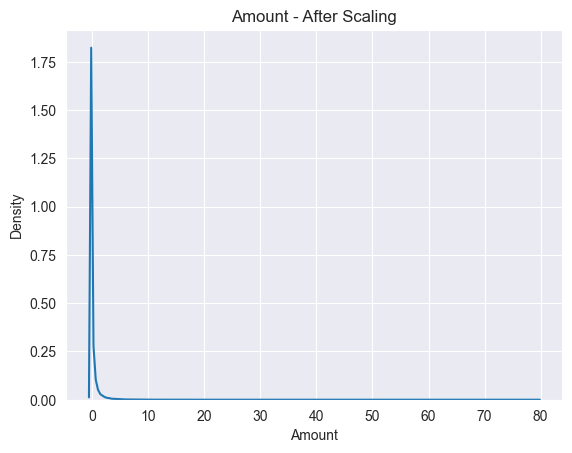

In [27]:
sns.kdeplot(X_train['Amount'])
plt.title("Amount - After Scaling")
plt.show()

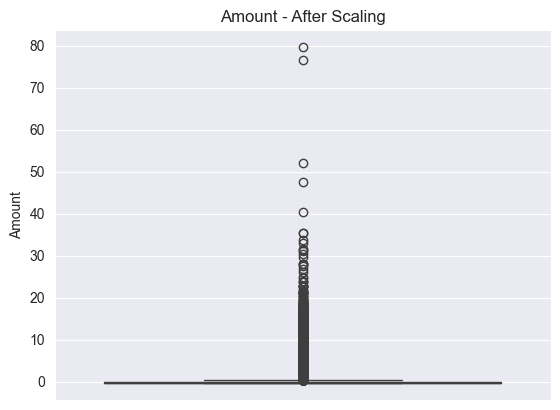

In [28]:
sns.boxplot(y=X_train['Amount'])
plt.title("Amount - After Scaling")
plt.show()

In [29]:
print("Before scaling:")
print(X_train_before['Amount'].mean(), X_train_before['Amount'].std())

print("\nAfter scaling:")
print(X_train['Amount'].mean(), X_train['Amount'].std())


Before scaling:
88.38712432813462 245.76704590462828

After scaling:
7.48796468384069e-17 1.000002202844533


### Train logistic regression

In [30]:
lr = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [31]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

In [32]:
print(classification_report(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

ROC-AUC 0.9245475297040328


### Training using RandomForest

In [33]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [34]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC 0.9446808668774371


### Training using XGBoost

In [35]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC", roc_auc_score(y_test, y_prob_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.77      0.85        95

    accuracy                           1.00     56746
   macro avg       0.98      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC 0.9790064559644509


In [37]:
for t in [0.5, 0.3, 0.2, 0.1]:
    y_pred_tune = (y_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_tune))


Threshold = 0.5
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Threshold = 0.3
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56651
           1       0.03      0.87      0.05        95

    accuracy                           0.95     56746
   macro avg       0.51      0.91      0.51     56746
weighted avg       1.00      0.95      0.97     56746


Threshold = 0.2
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56651
           1       0.02      0.92      0.03        95

    accuracy                           0.91     56746
   macro avg       0.51      0.91      0.49     56746
weighted avg       1.00

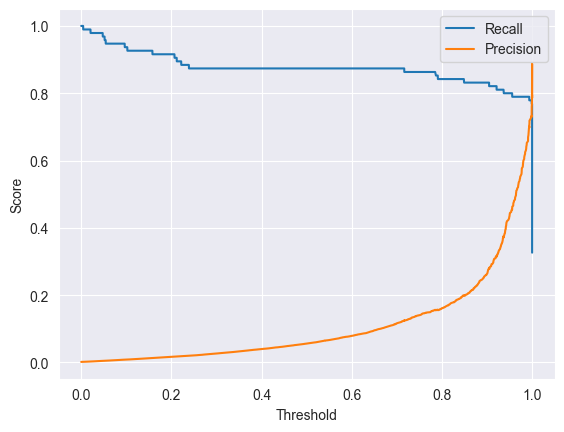

In [38]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, precision[:-1], label="Precision")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [39]:
df_thresh = pd.DataFrame({
    'threshold': thresholds,
    'precision': precision[:-1],
    'recall': recall[:-1]
})

df_thresh[df_thresh['recall'] > 0.85].head()

,threshold,precision,recall
0,5.161525e-26,0.001674,1.0
1,3.552824e-24,0.001674,1.0
2,2.986742e-23,0.001674,1.0
3,4.308397e-23,0.001674,1.0
4,1.738560e-22,0.001674,1.0


In [40]:
best_threshold = 0.15  # example

y_pred_final_lr = (y_prob>= best_threshold).astype(int)


In [41]:
print(classification_report(y_test, y_pred_final_lr))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     56651
           1       0.01      0.93      0.02        95

    accuracy                           0.88     56746
   macro avg       0.51      0.90      0.48     56746
weighted avg       1.00      0.88      0.93     56746



In [42]:
for t in [0.5, 0.3, 0.2, 0.1]:
    y_pred_rf_tuned = (y_prob_rf >= t).astype(int)
    print(f"\nRF Threshold = {t}")
    print(classification_report(y_test, y_pred_rf_tuned))


RF Threshold = 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746


RF Threshold = 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.74      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


RF Threshold = 0.2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.78      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg  

In [43]:
best_threshold = 0.01  # example

y_pred_final_rf = (y_prob_rf>= best_threshold).astype(int)

In [44]:
print(classification_report(y_test, y_pred_final_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.14      0.85      0.24        95

    accuracy                           0.99     56746
   macro avg       0.57      0.92      0.62     56746
weighted avg       1.00      0.99      0.99     56746



In [45]:
for t in [0.5, 0.3, 0.2, 0.1]:
    y_pred_xgb_tuned = (y_prob_xgb >= t).astype(int)
    print(f"\nXGB Threshold = {t}")
    print(classification_report(y_test, y_pred_xgb_tuned))


XGB Threshold = 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.77      0.85        95

    accuracy                           1.00     56746
   macro avg       0.98      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746


XGB Threshold = 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746


XGB Threshold = 0.2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.78      0.82        95

    accuracy                           1.00     56746
   macro avg       0.94      0.89      0.91     56746
weighted av

In [46]:
best_threshold = 0.05  # example

y_pred_final_xgb = (y_prob_xgb>= best_threshold).astype(int)

In [47]:
print(classification_report(y_test, y_pred_final_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.75      0.81      0.78        95

    accuracy                           1.00     56746
   macro avg       0.88      0.91      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [48]:
print("Logistic Regression"+"\n"+classification_report(y_test, y_pred_final_lr))
print("Random Forest"+"\n"+classification_report(y_test, y_pred_final_rf))
print("XGBoost"+"\n"+classification_report(y_test, y_pred_final_xgb))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     56651
           1       0.01      0.93      0.02        95

    accuracy                           0.88     56746
   macro avg       0.51      0.90      0.48     56746
weighted avg       1.00      0.88      0.93     56746

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.14      0.85      0.24        95

    accuracy                           0.99     56746
   macro avg       0.57      0.92      0.62     56746
weighted avg       1.00      0.99      0.99     56746

XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.75      0.81      0.78        95

    accuracy                           1.00     56746
   macro avg       0.88      0.91      0.89     56746
weighted avg       1.00      1.0

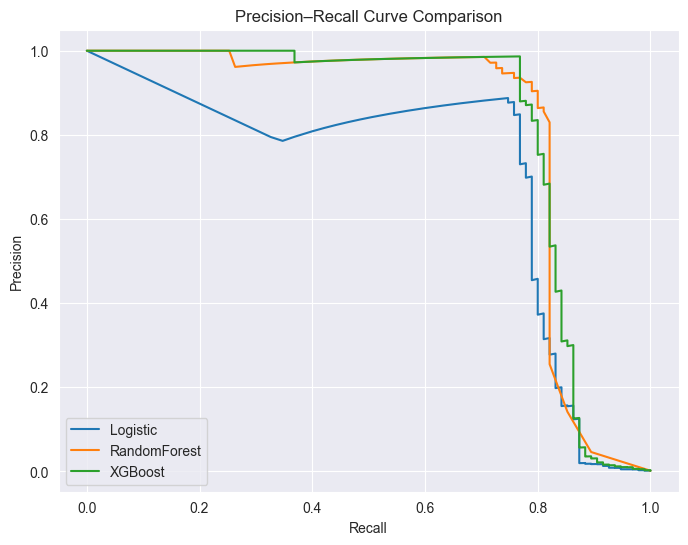

In [49]:
from sklearn.metrics import precision_recall_curve

models = {
    "Logistic": y_prob,
    "RandomForest": y_prob_rf,
    "XGBoost": y_prob_xgb
}

plt.figure(figsize=(8,6))

for name, probs in models.items():
    precision, recall, _ = precision_recall_curve(y_test, probs)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision–Recall Curve Comparison")
plt.show()

## Again do training with SMOT

In [50]:
# import libraries
from sklearn.model_selection import train_test_split

# import libraries for ml pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Splitting train, val and test set with stratified
`why val`
* The Threshold tuning must Not touch test data

In [51]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Here we split the dataset into train and temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Here we split that temp dataset into validation and test set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [52]:
pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight=None
    ))
])

In [53]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [54]:
y_val_prob = pipeline_lr.predict_proba(X_val)[:, 1]
y_test_prob = pipeline_lr.predict_proba(X_test)[:, 1]

### Threshold Tuning (Validation set)

In [55]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_prob)

best_threshold = 0.5
best_recall = 0

for p, r, t in zip(precisions, recalls, thresholds):
    if p >= 0.2 and r > best_recall:
        best_recall = r
        best_threshold = t


best_threshold

np.float64(0.9236653390779933)

In [56]:
y_test_pred = (y_test_prob >= best_threshold).astype(int)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

if len(y_test) != len(y_test_pred):
    print(f"Mismatch! y_test: {len(y_test)}, y_test_pred: {len(y_test_pred)}")
else:
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))

[[42266   222]
 [   11    60]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     42488
           1       0.21      0.85      0.34        71

    accuracy                           0.99     42559
   macro avg       0.61      0.92      0.67     42559
weighted avg       1.00      0.99      1.00     42559



In [58]:
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, y_test_prob)
pr_auc


np.float64(0.687243470897368)

In [59]:
pipeline_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

In [60]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [61]:
y_val_prob_rf = pipeline_rf.predict_proba(X_val)[:, 1]
y_test_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

In [62]:
from sklearn.metrics import precision_recall_curve

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_val, y_val_prob_rf)

best_threshold_rf = 0.5
best_recall_rf = 0
for p, r, t in zip(precisions_rf, recalls_rf, thresholds_rf):
    if p >= 0.2 and r > best_recall_rf:
        best_recall_rf = r
        best_threshold_rf = t

best_threshold_rf

np.float64(0.07)

In [63]:
y_test_pred_rf = (y_test_prob_rf >= best_threshold_rf).astype(int)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

[[42308   180]
 [   10    61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.25      0.86      0.39        71

    accuracy                           1.00     42559
   macro avg       0.63      0.93      0.69     42559
weighted avg       1.00      1.00      1.00     42559



In [65]:
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, y_test_prob_rf)
pr_auc

np.float64(0.8093206812581861)

In [146]:
# it's used to balance the class impact
# means it will treat same class weight to the minority class
# in this imbalance dataset fraud count (1) is less compare to (0)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

pipeline_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    ))
])

In [147]:
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [148]:
y_val_prob_xgb = pipeline_xgb.predict_proba(X_val)[:, 1]
y_test_prob_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

In [149]:
from sklearn.metrics import precision_recall_curve

precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_val, y_val_prob_xgb)

best_threshold_xgb = 0.5
best_recall_xgb = 0

for p, r, t in zip(precisions_xgb, recalls_xgb, thresholds_xgb):
    if p >= 0.2 and r > best_threshold_xgb:
        best_recall_xgb = r
        best_threshold_xgb = t

best_threshold_xgb

np.float32(0.77331614)

In [154]:
y_test_pred_xgb = (y_test_prob_xgb >= 0.96).astype(int)

In [155]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

[[42480     8]
 [   16    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.87      0.77      0.82        71

    accuracy                           1.00     42559
   macro avg       0.94      0.89      0.91     42559
weighted avg       1.00      1.00      1.00     42559



In [136]:
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, y_test_prob_xgb)
pr_auc

np.float64(0.7661989216025549)

### mlflow

In [137]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Credit Card Fraud - Model Comparison")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

In [138]:
from sklearn.metrics import classification_report, average_precision_score

def log_model_run(
        model_name,
        pipeline,
        y_test,
        y_test_prob,
        threshold
):
    y_test_pred = (y_test_prob >=threshold).astype(int)

    report = classification_report(
        y_test, y_test_pred, output_dict=True
    )

    pr_auc =  average_precision_score(y_test, y_test_prob)

    with mlflow.start_run(run_name=model_name):
        mlflow.log_param("status", "initialized")
        mlflow.log_param("model", model_name)
        mlflow.log_param("smote", True)
        mlflow.log_param("threshold", threshold)

        mlflow.log_metric("precision_fraud", report["1"]["precision"])
        mlflow.log_metric("recall_fraud", report["1"]["recall"])
        mlflow.log_metric("f1_fraud", report["1"]["f1-score"])
        mlflow.log_metric("pr_auc", pr_auc)

        mlflow.sklearn.log_model(
            pipeline,
            artifact_path="model"
        )

In [139]:
y_test_prob_lr = pipeline_lr.predict_proba(X_test)[:, 1]

log_model_run(
    model_name="Logistic Regression",
    pipeline=pipeline_lr,
    y_test=y_test,
    y_test_prob=y_test_prob_lr,
    threshold=best_threshold
)

2026/01/30 13:18:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/1/runs/c521552999ef4070b71ca865b44f0bd2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [140]:
y_test_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

log_model_run(
    model_name="Random Forest",
    pipeline=pipeline_rf,
    y_test=y_test,
    y_test_prob=y_test_prob_rf,
    threshold=best_threshold_rf
)

2026/01/30 13:18:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/1/runs/eee3efc43c8045a8af4428ecbd7c61a5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [141]:
y_test_prob_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

log_model_run(
    model_name="XGBoost",
    pipeline=pipeline_xgb,
    y_test=y_test,
    y_test_prob=y_test_prob_xgb,
    threshold=best_threshold_xgb
)

2026/01/30 13:18:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/1/runs/41f17c93efc24ba695b6e5cd1efdce5f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


### Model register in mlflow

In [142]:
run_id = input("Enter the run_id: ")
model_uri = f"runs:/{run_id}/model"

result = mlflow.register_model(
    model_uri=model_uri,
    name="CreditCardFraudModel_XGB_SMOTE"
)

Registered model 'CreditCardFraudModel_XGB_SMOTE' already exists. Creating a new version of this model...
2026/01/30 13:18:48 WARNING mlflow.tracking._model_registry.fluent: Run with id 41f17c93efc24ba695b6e5cd1efdce5f has no artifacts at artifact path 'model', registering model based on models:/m-32a095941ba64263a768f893e67faa86 instead
2026/01/30 13:18:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CreditCardFraudModel_XGB_SMOTE, version 2
Created version '2' of model 'CreditCardFraudModel_XGB_SMOTE'.


### load the model from registered model

In [143]:
model_name = "CreditCardFraudModel_XGB_SMOTE"
model_uri = f"models:/{model_name}@challenger"
loaded_model = mlflow.sklearn.load_model(model_uri)

y_pred_loaded = loaded_model.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred_loaded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.52      0.79      0.63        71

    accuracy                           1.00     42559
   macro avg       0.76      0.89      0.81     42559
weighted avg       1.00      1.00      1.00     42559

